# 3 Виконання

## 3.1 Обрати та завантажити дані

### Імпортуємо бібліотеки, визначимо налаштування для pandas, завантажимо датафрейм

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.options.display.max_colwidth = 60
pd.options.display.max_rows = 20
pd.options.display.max_columns = 20
pd.options.display.width = 600

path_criminal_statistic = 'data/90-2002_.xlsx' 
df = pd.read_excel(path_criminal_statistic)
df.columns = [
    'year', 'crimes', 'accused', 'adm', 'civils', 'fires']
df = df.set_index('year')
obj_cols = df.select_dtypes(['object'])
df[obj_cols.columns] = obj_cols.apply(lambda x: x.str.replace(' ', ''))
df = df.astype(str).apply(
    lambda x: x.str.replace(',', '.')).astype(float)
df

,crimes,accused,adm,civils,fires
year,,,,,
1990,3.70e+05,104199.0,6515.90,379.20,NaN
1991,4.06e+05,108553.0,7841.50,358.50,NaN
1992,4.80e+05,115260.0,9723.90,364.00,NaN
...,...,...,...,...,...
2015,5.65e+06,947986.0,1984.66,947.26,820166.0
2016,5.93e+06,762176.0,2183.66,751.26,753236.0
2017,5.24e+06,768046.0,2885.36,729.96,857246.0


*Завантажений датафрейм*

## 3.2 Знайти математичне сподівання, медіану, моду, дисперсію, середньоквадратичне відхилення

### Математичне сподівання – сума всіх значень, поділена на їхню кількість.

In [63]:
df.mean()

crimes     1.37e+06
accused    2.76e+05
adm        8.53e+03
civils     9.92e+02
fires      1.78e+05
dtype: float64

*Математичне сподівання*

### Медіана – це середина відсортованого набору даних.

In [64]:
df.median()

crimes     549007.50
accused    185573.00
adm          7759.70
civils        963.91
fires       49838.00
dtype: float64

*Медіана*

### Мода – це найчастіше значення, що зустрічається.

In [65]:
df.mode()

,crimes,accused,adm,civils,fires
0,3.70e+05,1.04e+05,1984.66,358.5,36814.0
1,3.90e+05,1.09e+05,2183.66,364.0,37596.0
2,4.06e+05,1.15e+05,2657.06,379.2,40237.0
...,...,...,...,...,...
25,5.29e+06,7.68e+05,14950.90,1593.8,NaN
26,5.65e+06,9.48e+05,15997.70,1680.2,NaN
27,5.93e+06,1.02e+06,22400.60,2193.3,NaN


*Мода*

### Дисперсія – це середнє арифметичне квадратів різниці кожного значення з математичним сподіванням.

In [66]:
df.var()

crimes     3.56e+12
accused    6.54e+10
adm        2.12e+07
civils     2.29e+05
fires      8.17e+10
dtype: float64

*Дисперсія*

### Середньоквадратичне відхилення – це дисперсія під коренем

In [67]:
df.var() ** 0.5

crimes     1.89e+06
accused    2.56e+05
adm        4.61e+03
civils     4.79e+02
fires      2.86e+05
dtype: float64

*Середньоквадратичне відхилення*

## 3.3 Візуалізувати завантажені дані за допомогою гістограми

### Візуалізуємо дані за допомогою методу plot та оберемо тип "bar" для відображення гістограми.

<AxesSubplot: xlabel='year'>

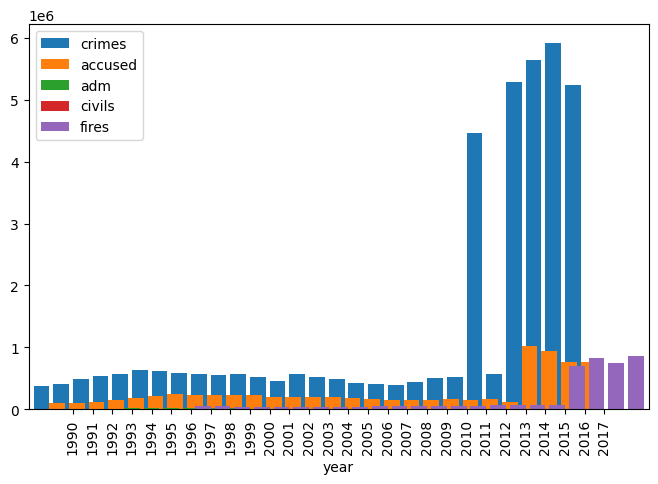

In [68]:
df.plot(kind='bar', figsize=(8, 5), width=4)

*Статистика злочинів*

## 3.4 Проробити всі дії з пункту про Series та DataFrame

### Створюємо Series зі значеннями кількості злочинів на рік.

In [69]:

crimes = pd.Series([ 369809.,  405516.,  480478.,  539299.,  572147.,  641860.,
        617262.,  589208.,  575982.,  558716.,  567795.,  514597.,
        460389.,  566350.,  527812.,  491754.,  428149.,  408170.,
        390162.,  439459.,  505371.,  520218., 4471474.,  563560.,
       5291395., 5651827., 5926047., 5239117.])
crimes

0     3.70e+05
1     4.06e+05
2     4.80e+05
        ...   
25    5.65e+06
26    5.93e+06
27    5.24e+06
Length: 28, dtype: float64

*Кількість злочинів на рік*

### Отримуємо другий запис.

In [70]:
crimes[1]

405516.0

*Другий запис*

### Рахуємо кількість записів.

In [71]:
crimes.count()

28

*Кількість записів*

### Рахуємо математичне сподівання

In [72]:
crimes.mean()

1368354.392857143

*Математичне сподівання*

### Рахуємо найменше значення

In [73]:
crimes.min()

369809.0

*Найменше значення*

### Рахуємо найбільше значення

In [74]:
crimes.max()

5926047.0

*Найбільше значення*

### Рахуємо середньоквадратичне відхилення

In [75]:
crimes.std()

1887473.2573186466

*Cередньоквадратичне відхилення*

### Отримуємо статистику набору даних (кількість, математичне сподівання, середньоквадратичне відхилення, найменше та найбільше значення, квантилі)

In [78]:
df.describe()

,crimes,accused,adm,civils,fires
count,2.80e+01,2.80e+01,28.00,28.00,23.00
mean,1.37e+06,2.76e+05,8531.50,991.71,177576.52
std,1.89e+06,2.56e+05,4607.70,478.58,285807.64
...,...,...,...,...,...
50%,5.49e+05,1.86e+05,7759.70,963.91,49838.00
75%,5.96e+05,2.31e+05,10041.67,1289.22,63733.50
max,5.93e+06,1.02e+06,22400.60,2193.30,857246.00


*Cтатистика набору даних*

### Створення Series зі словника, де ключі - роки, значення - кількість злочинів

In [79]:
crimes = pd.Series(
    {
        1990: 369809.0,
        1991: 405516.0,
        1992: 480478.0,
        1993: 539299.0,
        1994: 572147.0,
        1995: 641860.0,
        1996: 617262.0,
        1997: 589208.0,
        1998: 575982.0,
        1999: 558716.0,
        2000: 567795.0,
        2001: 514597.0,
        2002: 460389.0,
        2003: 566350.0,
        2004: 527812.0,
        2005: 491754.0,
        2006: 428149.0,
        2007: 408170.0,
        2008: 390162.0,
        2009: 439459.0,
        2010: 505371.0,
        2011: 520218.0,
        2012: 4471474.0,
        2013: 563560.0,
        2014: 5291395.0,
        2015: 5651827.0,
        2016: 5926047.0,
        2017: 5239117.0
    }
)
crimes

1990    3.70e+05
1991    4.06e+05
1992    4.80e+05
          ...   
2015    5.65e+06
2016    5.93e+06
2017    5.24e+06
Length: 28, dtype: float64

*Series зі словника*

### Отримуємо кількість злочинів за 1992 рік

In [ ]:
crimes[1992]

*Кількість злочинів за 1992 рік*

### Отримуємо тип даних

In [ ]:
crimes.dtype

*Тип даних*

### Отримуємо значення набору даних

In [ ]:
crimes.values

*Значення набору даних*

### Створення DataFrame зі словника

In [ ]:
dd = pd.DataFrame(
  {
    1990: [369809.0, 104199.0, 6515.9, 379.2, float('nan')],
    1991: [405516.0, 108553.0, 7841.5, 358.5, float('nan')],
    1992: [480478.0, 115260.0, 9723.9, 364.0, float('nan')],
    1993: [539299.0, 152878.0, 11767.1, 407.7, float('nan')],
    1994: [572147.0, 174959.0, 15997.7, 399.2, float('nan')],
    1995: [641860.0, 212915.0, 22400.6, 453.3, 47875.0],
    1996: [617262.0, 242124.0, 14950.9, 550.1, 46824.0],
    1997: [589208.0, 237790.0, 14232.1, 599.8, 42507.0],
    1998: [575982.0, 232598.0, 13330.7, 744.2, 41294.0],
    1999: [558716.0, 222239.0, 10542.0, 772.6, 40237.0],
    2000: [567795.0, 230903.0, 9395.4, 911.4, 37596.0],
    2001: [514597.0, 202609.0, 6384.1, 1057.0, 36814.0],
    2002: [460389.0, 194212.0, 6472.4, 1166.4, 41794.0],
    2003: [566350.0, 201081.0, 7097.3, 1259.3, 40374.0],
    2004: [527812.0, 204794.0, 7013.7, 1457.5, 49654.0],
    2005: [491754.0, 176934.0, 6370.3, 1116.2, 53751.0],
    2006: [428149.0, 160865.0, 7677.9, 1322.3, 51432.0],
    2007: [408170.0, 152772.0, 8867.5, 1499.0, 55708.0],
    2008: [390162.0, 146858.0, 9874.9, 1680.2, 49838.0],
    2009: [439459.0, 146383.0, 8280.5, 1541.8, 48998.0],
    2010: [505371.0, 168774.0, 8854.1, 2193.3, 64743.0],
    2011: [520218.0, 154356.0, 6709.9, 1593.8, 62724.0],
    2012: [4471474.0, 162881.0, 4621.1, 1278.2, 73405.0],
    2013: [563560.0, 122973.0, 4249.9, 1253.8, 62118.0],
    2014: [5291395.0, 1021706.0, 2657.06, 980.56, 705926.0],
    2015: [5651827.0, 947986.0, 1984.66, 947.26, 820166.0],
    2016: [5926047.0, 762176.0, 2183.66, 751.26, 753236.0],
    2017: [5239117.0, 768046.0, 2885.36, 729.96, 857246.0]
  }
).T
dd

*DataFrame зі словника*

### Отримаємо дані про злочини за роки незалежності, використовуючи стовпець

In [ ]:
dd.columns = ['crimes', 'accused', 'adm', 'civils', 'fires']
dd.crimes

*Дані про злочини за роки незалежності*

### Отримаємо дані про злочини за 1992 рік, використовуючи явний індекс

In [ ]:
dd.loc[1992]

*Дані про злочини за 1992 рік, використовуючи явний індекс*

### Отримаємо дані про злочини за 1992 рік, використовуючи неявний індекс

In [ ]:
dd.iloc[1]

*Дані про злочини за 1992 рік, використовуючи неявний індекс*

###  Отримуємо дані про злочини з 1992 до 1995 для явних індексів, де для явних останній вказаний індекс включається

In [ ]:
dd.loc[1992:1995]

*Дані про злочини з 1992 до 1995 для явних індексів*

###  Отримуємо дані про злочини з 1992 до 1994 для НЕявних індексів, де для НЕявних останній вказаний індекс НЕ включається

In [ ]:
dd.iloc[2:5]

*Дані про злочини з 1992 до 1995 для неявних індексів*

### Отримуємо дані про злочини з 1992 І з 1995 для явних індексів

In [ ]:
dd.loc[[1992, 1995]]

*Дані про злочини з 1992 І з 1995 для явних індексів*

### Отримуємо дані про злочини з 1992 І з 1995 для неявних індексів

In [ ]:
dd.iloc[[2, 5]]

*Дані про злочини з 1992 І з 1995 для неявних індексів*

### Отримуємо дані про злочини явних ідексів та стовпців

In [ ]:
dd.loc[1992:1995, 'crimes':'accused']

*Дані про злочини явних ідексів та стовпців*

### Отримуємо дані про злочини неявних ідексів та стовпців

In [ ]:
dd.iloc[2:5, 0:2]

*Дані про злочини неявних ідексів та стовпців*

### Відображаємо рядки, де кількість злочинів > 550 000

In [ ]:
dd[dd.crimes > 550000]

*Рядки, де кількість злочинів > 550 000*

### Відображаємо рядки, де кількість злочинів > 550 000 і < 600 000

In [ ]:
dd[(dd.crimes > 550000) & (dd.crimes < 600000)]

*Рядки, де кількість злочинів > 550 000 і < 600 000*

### Отримуємо кількість злочинів за 1992 рік явно

In [ ]:
dd.at[1992, 'crimes']

*Кількість злочинів за 1992 рік явно*

### Отримуємо кількість злочинів за 1992 рік неявно

In [ ]:
dd.iat[2, 0]

*Кількість злочинів за 1992 рік неявно*

### Змінюємо значення кількості злочинів за 1992 явно

In [ ]:
dd.at[1992, 'crimes'] = 11
dd.at[1992, 'crimes']

*Зміна значення кількості злочинів за 1992 явно*

### Змінюємо значення кількостізлочинів за 1992 НЕявно

In [ ]:
dd.iat[2, 0] = 22
dd.iat[2, 0]

*Зміна значення кількості злочинів за 1992 неявно*

### Інформацію про набір даних( кількість рядків, математичне сподівання, середньоквадратичне відхилення, найменше та найбільше значення, квантилі )

In [ ]:
dd.describe()

*Інформація про набір даних*

### Зміна точності виведення дійсних чисел

In [ ]:
pd.options.display.precision = 2
dd.describe()

*Зміна точності виведення дійсних чисел*

### Знайдемо математичне сподівання для кожного стовпчика

In [ ]:
dd.mean()

*Математичне сподівання для кожного стовпчика*

### Транспонуємо набір даних

In [ ]:
dd.T

*Транспонований набір даних*

### Знаходження інформації про транспонований набір даних

In [ ]:
dd.T.describe()

*Інформація про транспонований набір даних*

### Отримуємо математичне сподівання для транспонованого набору даних, де тепер значення отримаємо не по стобцях, а по роках

In [ ]:
dd.T.mean()

*Математичне сподівання для транспонованого набору даних*

### Сортуємо набір даних за індексом за зростанням

In [ ]:
dd.sort_index(ascending=True)

*Набір даних, відсортований за індексом за зростанням*

### Сортуємо набір даних за індексом за спаданням

In [ ]:
dd.sort_index(ascending=False)

*Набір даних, відсортований за індексом за спаданням*

### Сортуємо стовпці за кількість скоєних злочинів

In [ ]:
dd.sort_values(by='crimes', ascending=False)

*Стовпці, відсортовані за кількість скоєних злочинів*

### Сортуємо види порушень в транспонованому наборі даних за спаданням за 1992 рік

In [ ]:
dd.T.sort_values(by=1992, ascending=False)

*Види порушень в транспонованому наборі даних, відсортовані за спаданням за 1992 рік*

### Сортуємо стовпці за кількість скоєних злочинів, де inplace=True, щоб сортування відбувалося в самому наборі даних

In [ ]:
dd.sort_values(by='crimes', ascending=False, inplace=True)

*Cтовпці, відсортовані за кількість скоєних злочинів*

## 3.5 Виконати первинну обробку даних

### Виконано в пункті 3.1

## 3.6 Прочитати набір даних катастрофи «Титаніка»

## 3.7 Завантажити набір даних катастрофи «Титаніка» за URL-адресою

### Завантаження набору даних катастрофи «Титаніка»

In [ ]:
titanic = pd.read_csv('https://vincentarelbundock.github.io/Rdatasets/csv/carData/TitanicSurvival.csv')
titanic

*Дані про катастрофу*

## 3.8 Переглянути рядки  набору даних катастрофи «Титаніка»

### Встановлення точності виведення

In [ ]:
pd.options.display.precision = 2
pd.options.display.precision

*Точність виведення*

### Отримання перших 5-ти рядків

In [ ]:
titanic.head()

*Перші п'ять рядків*

### Отримання останніх 5-ти рядків

In [ ]:
titanic.tail()

*Останні п'ять рядків*

## 3.9 Налаштувати  назви стовпців

### Встановлення назви стовпців

In [ ]:
titanic.columns = ['name', 'survived', 'sex', 'age', 'class']
titanic

*Дані про катастрофу*

## 3.10 Провести простий аналіз даних: визначити наймолодшого пасажира, найстаршого, який був середній вік пасажирів та статистику по пасажирам які вижили. Відсортувати всіх жінок з кают 1-го класу, знайти наймолодшу та найстаршу серед них, кількість вцілілих

### Отримання наймолодшого пасажира за допомогою знаходження рядка за його індексом, знайденого за найменшим значенням

In [ ]:
titanic.loc[titanic.age.idxmin()]

*Наймолодший пасажир*

### Отримання найстаршого пасажира за допомогою знаходження рядка за його індексом, знайденого за найбільшим значенням

In [ ]:
titanic.loc[titanic.age.idxmax()]

*Найстарший пасажир*

### Знаходження середнього віку пасажирів методом mean

In [ ]:
titanic.age.mean()

*Середній вік пасажирів*

### Отримання вцілілих пасажирів за допомогою маски

In [ ]:
survived = titanic[titanic.survived == 'yes']
survived

*Уцілілі пасажири*

### Статистика по вцілілих пасажирах (кількість, середній вік, середньоквадратичне відхилення віку, найменший вік, найбільший та квантилі)

In [ ]:
survived.describe()

*Статистика по вцілілих пасажирах*

### Фільтрування за статтю( жінки ) та класом ( 1ий клас )

In [ ]:
first_class_women = titanic[(titanic.sex == 'female') & (titanic['class'] == '1st')]
first_class_women

*Жінки 1-го класу*

### Отримання наймолодшої жінки з 1-го класу

In [ ]:
first_class_women.loc[first_class_women.age.idxmin()]

*Наймолодша жінка з 1-го класу*

### Отримання найстаршої жінки з 1-ого класу

In [ ]:
first_class_women.loc[first_class_women.age.idxmax()]

*Найстарша жінка з 1-го класу*

### Знайдемо кількість жінок з першого класу, що вижили

In [ ]:
len(first_class_women[first_class_women.survived == 'yes'])

*Кількість жінок з першого класу, що вижили*

## 3.11 Побудувати гістограму віку пасажирів

### Гістограма віку матодом hist

In [ ]:
titanic.age.hist()

*Гістограма віку*